In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import quad # Functions of integrals calculs

In [3]:
# Functions for our program

def an(n, w, function, t0):
    '''
    Возвращает значение коэффициента a_n
    n - номер гармоники, w - угловая частота, function - функция сигнала, t0 - начальное время.
    '''
    T = 2 * np.pi / w
    return (2/T) *\
        (quad(lambda t: np.cos(n*w*t) * function(t), t0, t0+T))[0]


def bn(n, w, function, t0):
    '''
    Возвращает значение коэффициента b_n
    n - номер гармоники, w - угловая частота, function - функция сигнала, t0 - начальное время.
    '''
    T = 2 * np.pi / w
    return (2/T) *\
        (quad(lambda t: np.sin(n*w*t) * function(t), t0, t0+T))[0]

def Fourier(function, t0, T, N, t):
    '''
    Возвращает значения ряда Фурье для каждого момента времени из временной шкалы x.
    function - функция сигнала, t0 - начальное время, T - период сигнала,
    N - количество гармоник для расчета ряда Фурье, x - временная шкала.
    args - дополнительные аргументы для функции function.

    '''
    w = np.pi * 2 / T
    a0 = (2/T) * (quad(lambda t: function(t), t0, t0+T))[0]


    def F(t): return a0/2 + \
        sum(an(n, w, function, t0)*np.cos(n*w*t) +
            bn(n, w, function, t0)*np.sin(n*w*t)
            for n in range(1, N))
    return [F(i) for i in t]



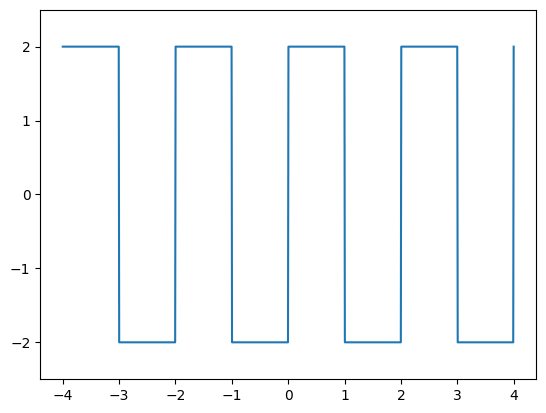

In [4]:
# Write of periodic signal

def square_signal(t, A, T):
    '''
    Функция возвращает значение прямоугольного сигнала в заданный момент времени t.
    t - момент времени, A - амплитуда сигнала, T - период сигнала.
    '''
    return A * signal.square(2 * np.pi * t / T)

# Начальное и конечное время для генерации прямоугольного сигнала
t0_square = -4
t1_square = 4

# Амплитуда и период сигнала
A_square = 2
T_square = 2

# Количество точек для генерации прямоугольного сигнала
num_square = 1000

# Генерация временной шкалы с равномерным шагом.
t_square = np.linspace(t0_square, t1_square, num_square)
# Генерация значений прямоугольного сигнала для каждого момента времени.
y = [square_signal(t, A_square, T_square) for t in t_square]

plt.plot(t_square, y)
plt.ylim(-2.5, 2.5)
plt.show()

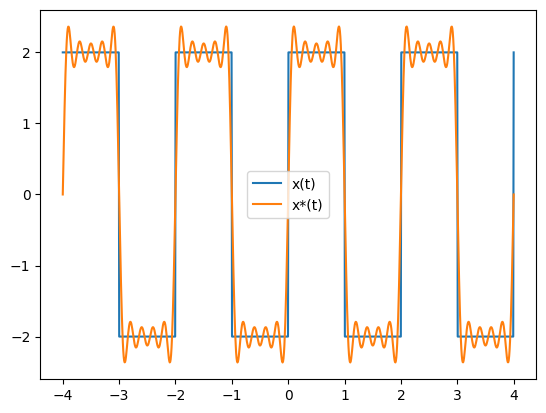

In [5]:
# 1)

# Количество гармоник для расчета ряда Фурье.
N_square = 10

# Расчет значений ряда Фурье для прямоугольного сигнала.
y_ = Fourier(lambda t: square_signal(t, A_square, T_square),
             t0_square, T_square, N_square, t_square)

plt.plot(t_square, y, label = 'x(t)')
plt.plot(t_square, y_, label = 'x*(t)')
plt.legend()
plt.show()

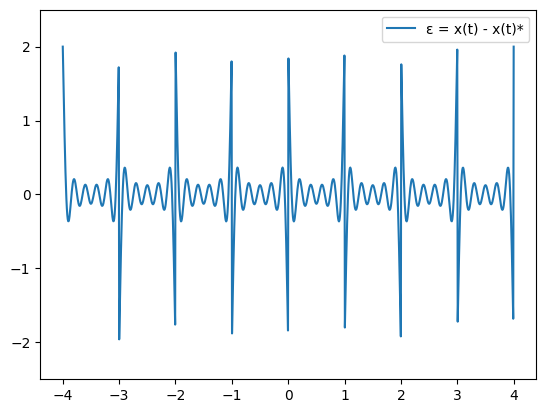

In [6]:
eps = [a - b for a, b in zip(y, y_)]
plt.plot(t_square, eps, label = 'ε = x(t) - x(t)*')
plt.ylim(-2.5, 2.5)
plt.legend()
plt.show()